<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week02-LR/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Normal equation**

theta =  [0.57142857 0.85714286]
y predict =  [0.57142857 9.14285714]


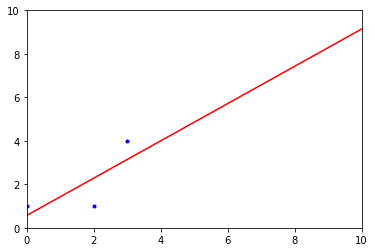

In [185]:
import numpy as np
x = np.array([0,2,3])
y = np.array([1,1,4])
x_b = np.c_[np.ones((3,1)),x]

#call inverse function from linear algebra module
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print("theta = ", theta_best)

#prediction
x_n = np.array([[0],[10]])
x_n_b = np.c_[np.ones((2,1)), x_n]
y_p = x_n_b.dot(theta_best)
print("y predict = ",y_p)

import matplotlib.pyplot as plt
plt.plot(x_n, y_p,"r-")
plt.plot(x,y, "b.")
plt.axis([0,10,0,10])
plt.show()


**Sklearn**

In [186]:
import numpy as np
from sklearn.linear_model import LinearRegression 
x = np.array([[0,2,3]]).T
y = np.array([1,1,4])

lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.intercept_, " , ", lin_reg.coef_)
x_n = np.array([[0]]).T
ans = lin_reg.predict(x_n)
print(ans)


0.5714285714285712  ,  [0.85714286]
[0.57142857]


**Gradient descent**


In [187]:
lossDict1 = {}
lossDict2 = {}

x.shape = (3, 1) y.shape = (3,)
<class 'list'>   [1]
>> [4]
Converged at  127 / 2000
theta0 = [0.86758281] theta1 = [0.78033748]
intercept = 0.5714285714285714 slope = 0.8571428571428571


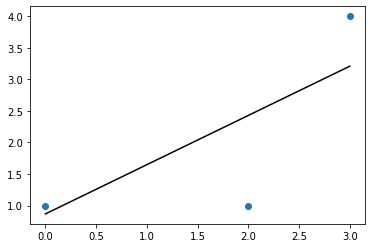

In [188]:
import numpy as np
import random
import sklearn
#from sklearn.datasets.samples_generator import make_regression 
import matplotlib.pyplot as plt
from scipy import stats

def cost_function(theta0, theta1, x, y, m):
    c = sum([(theta0 + theta1*x[i] - y[i])**2 for i in range(m)])
    return c

def gradient_descent(alpha, x, y, ep=0.001, max_iter=10000):

    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t0 = [1] #np.random.random(x.shape[1])
    print(type(t0)," ",t0)
  
    t1 = [1] #np.random.random(x.shape[1])

    # total error, J(theta)
    J = cost_function(t0,t1,x,y,m)
    print(">>",J)
    lossDict1[t0[0]] = J[0]
    lossDict2[t1[0]] = J[0]

    # Iterate Loop
    while not converged:
        grad0 = sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
        # update theta
        t0 = temp0
        t1 = temp1

        # error
        e = cost_function(t0,t1,x,y,m)
       
        #Terminate 1
        if abs(J-e) <= ep:
           print("Converged at ", iter, "/", max_iter)
           converged = True
    
        J = e   # update error s
        iter += 1  # update iter

        lossDict1[t0[0]] = J[0]
        lossDict2[t1[0]] = J[0]
    
        #Termiate 2
        if iter == max_iter:
            print('Max interactions exceeded!')
            converged = True

    return t0,t1


if __name__ == '__main__':

    #x, y = make_regression(n_samples=100, n_features=1, n_informative=1, random_state=0, noise=35) 
    x = np.array([[0,2,3]]).T # or x = np.array([[0],[2],[3]])
    y = np.array([1,1,4])
    print("x.shape = %s y.shape = %s" %(x.shape, y.shape))
    alpha = 0.001 # learning rate

    theta0, theta1 = gradient_descent(alpha, x, y, max_iter=2000)
    print (("theta0 = %s theta1 = %s") %(theta0, theta1)) 

    # check with scipy linear regression 
    slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
    print (("intercept = %s slope = %s") %(intercept, slope))

    # plot
    for i in range(x.shape[0]):
        y_predict = theta0 + theta1*x 

    plt.plot(x,y,'o')
    plt.plot(x,y_predict,'k-')
    plt.show()

#Gradient Descent curve Static VS Dynamic

(0.8675828064691213, 0.8680912236691516, 0.8686036797143897, 0.8691202329277811, 0.8696409425214763, 0.8701658686104343, 0.870695072226234, 0.8712286153310967, 0.8717665608321243, 0.8723089725957537, 0.8728559154624334, 0.8734074552615249, 0.8739636588264313, 0.8745245940099581, 0.8750903296999082, 0.8756609358349168, 0.8762364834205273, 0.8768170445455139, 0.877402692398454, 0.8779935012845537, 0.8785895466427311, 0.8791909050629615, 0.8797976543038863, 0.8804098733106938, 0.8810276422332711, 0.8816510424446362, 0.8822801565596496, 0.8829150684540146, 0.8835558632835663, 0.8842026275038576, 0.8848554488900434, 0.8855144165570699, 0.8861796209801722, 0.8868511540156867, 0.8875291089221801, 0.8882135803819037, 0.8889046645225748, 0.8896024589394913, 0.8903070627179858, 0.8910185764562216, 0.8917371022883392, 0.8924627439079561, 0.8931956065920258, 0.8939357972250629, 0.8946834243237383, 0.8954385980618506, 0.89620143029568, 0.89697203458973, 0.8977505262428627, 0.8985370223148345, 0.899

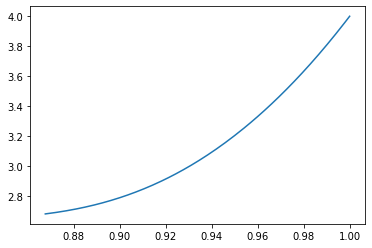

In [189]:
lists = sorted(lossDict1.items()) # sorted by key, return a list of tuples
_x, _y = zip(*lists) # unpack a list of pairs into two tuples
print(_x)
print(">>")
print(_y)
plt.plot(_x, _y)

(0.7803374765107646, 0.7808287058045698, 0.7813290012189885, 0.7818385029216083, 0.7823573532261557, 0.7828856966253372, 0.7834236798241828, 0.783971451773899, 0.7845291637062408, 0.7850969691684089, 0.7856750240584813, 0.786263486661387, 0.7868625176854298, 0.7874722802993714, 0.788092940170082, 0.7887246655007666, 0.7893676270697764, 0.7900219982700141, 0.7906879551489426, 0.7913656764492051, 0.792055343649867, 0.7927571410082895, 0.7934712556026433, 0.7941978773750727, 0.7949371991755209, 0.795689416806225, 0.7964547290668929, 0.7972333378005704, 0.7980254479402109, 0.7988312675559577, 0.7996510079031488, 0.800484883471058, 0.8013331120323798, 0.8021959146934734, 0.8030735159453741, 0.8039661437155863, 0.8048740294206679, 0.8057974080196204, 0.8067365180680955, 0.8076916017734312, 0.8086629050505298, 0.8096506775785913, 0.8106551728587148, 0.8116766482723811, 0.8127153651408305, 0.8137715887853494, 0.814845588588478, 0.8159376380561567, 0.8170480148808217, 0.818177001005467, 0.81932

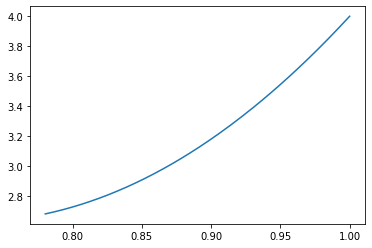

In [190]:
lists2 = sorted(lossDict2.items()) # sorted by key, return a list of tuples
_x2, _y2 = zip(*lists2) # unpack a list of pairs into two tuples
print(_x2)
print(",,")
print( _y2)
plt.plot(_x2, _y2)

In [191]:
import plotly.graph_objects as go
import numpy as np

_x = list(_x)
_y = list(_y)
xm = np.min(_x) - 0.2
xM = np.max(_x) + 0.2
ym = np.min(_y) - 0.2
yM = np.max(_y) + 0.2
N = len(_x)

# Create figure
fig = go.Figure(
    data=[go.Scatter(x=_x, y=_y,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=_x, y=_y,
                     mode="lines",
                     line=dict(width=2, color="blue"))],
    layout=go.Layout(
        xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
        yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
        title_text="Gradient Descent Curve",     
        hovermode="closest",
        xaxis_title="Theta0", 
        yaxis_title="Loss value (MSE)",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[_x[k]],
            y=[_y[k]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(N-1,0,-5)],
)

fig.show()

In [192]:
import plotly.graph_objects as go
import numpy as np

_x = list(_x2)
_y = list(_y2)
xm = np.min(_x) - 0.2
xM = np.max(_x) + 0.2
ym = np.min(_y) - 0.2
yM = np.max(_y) + 0.2
N = len(_x)

# Create figure
fig = go.Figure(
    data=[go.Scatter(x=_x, y=_y,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=_x, y=_y,
                     mode="lines",
                     line=dict(width=2, color="blue"))],
                
    layout=go.Layout(
        xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
        yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
        title_text="Gradient Descent Curve", 
        hovermode="closest",
        xaxis_title="Theta1", 
        yaxis_title="Loss value (MSE)",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[_x[k]],
            y=[_y[k]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(N-1,0,-5)],
)

fig.show()